In [108]:
import pandas as pd

In [109]:
# Caminho do arquivo
url = "vagas.csv"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

In [110]:
df.head()

,id,idade,cargo,nomeEmpresa,descricao,competencia,deficiencia,etnia,genero,local,salario
0,1,33,Web Developer II,Devify,As a company,Network Administrator,fisico,Hispanic,non-binary,Rio de Janeiro,9987.07
1,2,17,Occupational Therapist,Divavu,As a company,IT Consultant,mental,Asian,non-binary,Brasília,2291.96
2,3,54,VP Sales,Meedoo,we prioritize customer satisfaction and strive...,Web Developer,mental,Hispanic,male,Brasília,6964.78
3,4,0,Account Executive,Talane,We are a leading company in the industry.,Data Analyst,mental,Hispanic,male,Salvador,7530.04
4,5,9,Staff Accountant IV,Ooba,we have established ourselves as a trusted nam...,Web Developer,mental,Asian,non-binary,Fortaleza,8314.96


In [111]:
# Define o nome das colunas
header = ['idade','cargo', 'nomeEmpresa', 'descricao', 'competencia', 'deficiencia','etnia','genero','local','salario']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [112]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, id to 500
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idade        501 non-null    object
 1   cargo        501 non-null    object
 2   nomeEmpresa  501 non-null    object
 3   descricao    501 non-null    object
 4   competencia  501 non-null    object
 5   deficiencia  501 non-null    object
 6   etnia        501 non-null    object
 7   genero       501 non-null    object
 8   local        501 non-null    object
 9   salario      501 non-null    object
dtypes: object(10)
memory usage: 43.1+ KB


In [113]:
df.describe()

,idade,cargo,nomeEmpresa,descricao,competencia,deficiencia,etnia,genero,local,salario
count,501,501,501,501,501,501,501,501,501,501
unique,62,157,278,8,6,5,6,4,6,501
top,39,Senior Quality Engineer,Meevee,We are a leading company in the industry.,Data Analyst,fisico,African American,male,São Paulo,salario
freq,20,10,6,78,105,141,120,195,104,1


In [114]:
# retorna a quantiade de classes da coluna

#df.competencia.unique()
#df.deficiencia.unique()
df.etnia.unique()

array(['etnia', 'Hispanic', 'Asian', 'African American', 'Caucasian',
       'Native American'], dtype=object)

In [115]:
# agrupamento por média

#df.groupby('competencia').mean()
#df.groupby('deficiencia').mean()
df.groupby('etnia').mean()

<ipython-input-115-6b069044d149>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('etnia').mean()


""
etnia
African American
Asian
Caucasian
Hispanic
Native American
etnia


In [116]:
#  Quantidade de cada categoria
df.groupby('competencia').size()
df.groupby('deficiencia').size()
df.groupby('etnia').size()

etnia
African American    120
Asian               104
Caucasian            76
Hispanic            110
Native American      90
etnia                 1
dtype: int64

In [117]:
import numpy as np

# cópia de df
df_competencia = df

# Gera dados faltante no dataset
for col in df_competencia.columns[:-1]:
    df_competencia.loc[np.random.choice(df_competencia.index, 5), col] = np.nan


In [118]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, id to 500
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idade        496 non-null    object
 1   cargo        496 non-null    object
 2   nomeEmpresa  496 non-null    object
 3   descricao    496 non-null    object
 4   competencia  496 non-null    object
 5   deficiencia  496 non-null    object
 6   etnia        496 non-null    object
 7   genero       496 non-null    object
 8   local        496 non-null    object
 9   salario      501 non-null    object
dtypes: object(10)
memory usage: 59.2+ KB


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

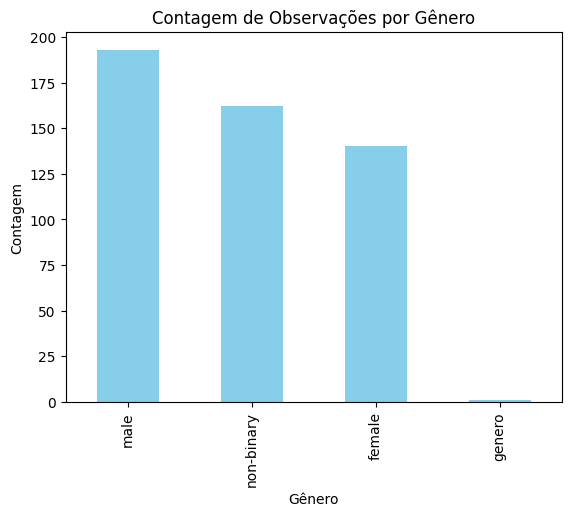

In [120]:
# Gráfico de linha para a média do comprimento da sépala de cada espécie
# Contagem de observações em cada categoria
count = df_competencia['genero'].value_counts()

# Crie um gráfico de barras
count.plot(kind='bar', color='skyblue')

# Configure os rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Observações por Gênero')

# Exiba o gráfico
plt.show()


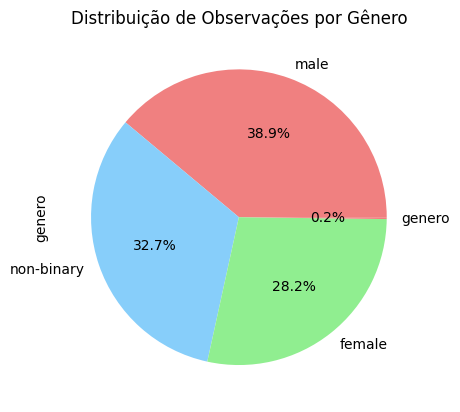

In [121]:
# Contagem de observações em cada categoria
count = df_competencia['genero'].value_counts()

# Crie um gráfico de setores (gráfico de pizza)
count.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])

# Configure o título
plt.title('Distribuição de Observações por Gênero')

# Exiba o gráfico
plt.show()


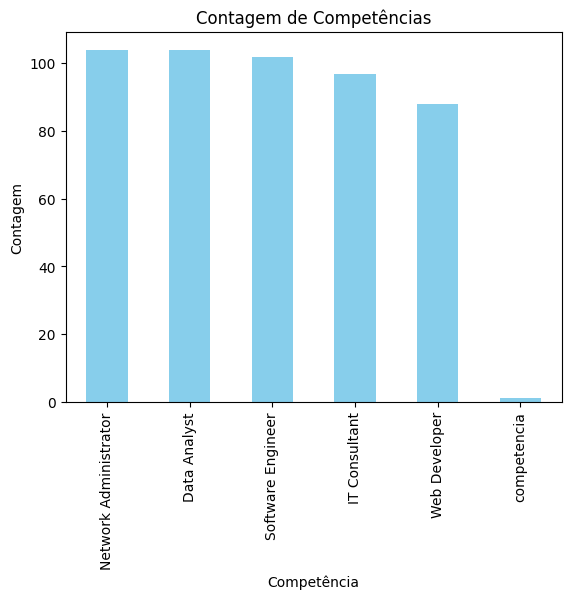

In [122]:
import matplotlib.pyplot as plt

# Contagem de valores únicos em 'competencia'
count = df['competencia'].value_counts()

# Crie um gráfico de barras
count.plot(kind='bar', color='skyblue')

plt.title('Contagem de Competências')
plt.xlabel('Competência')
plt.ylabel('Contagem')

plt.show()


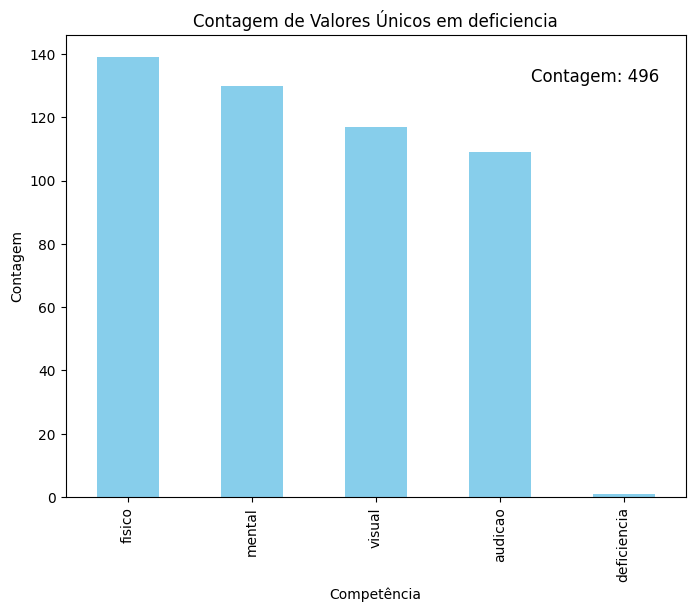

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df' seja o seu DataFrame

# Crie um gráfico de barras para a contagem de valores únicos em 'deficiencia'
count = df['deficiencia'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color='skyblue')

# Adicione a contagem como texto no gráfico
plt.text(0.75, 0.9, f'Contagem: {count.sum()}', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.title('Contagem de Valores Únicos em deficiencia')
plt.xlabel('Competência')
plt.ylabel('Contagem')
plt.show()


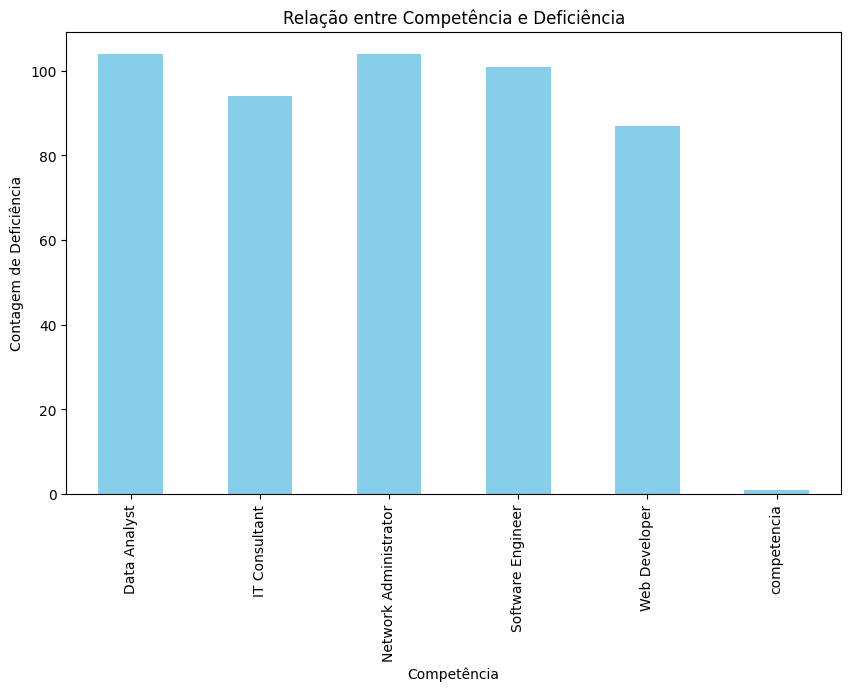

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df_competencia' seja o seu DataFrame

# Calcule a contagem de valores na coluna 'deficiencia' para cada valor na coluna 'competencia'
count_relationship = df_competencia.groupby('competencia')['deficiencia'].count()

# Crie um gráfico de barras para mostrar a relação entre 'competencia' e 'deficiencia'
count_relationship.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Relação entre Competência e Deficiência')
plt.xlabel('Competência')
plt.ylabel('Contagem de Deficiência')
plt.show()


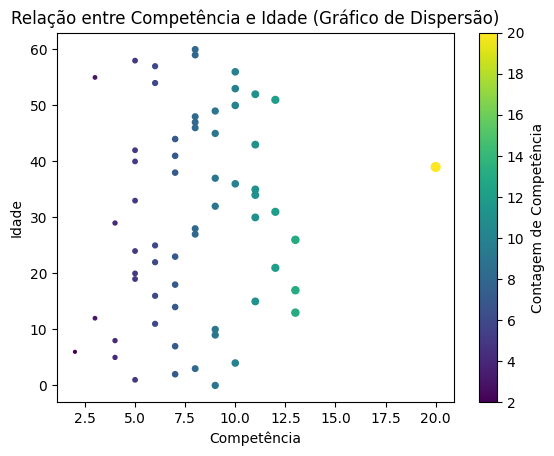

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df_competencia' seja o seu DataFrame

# Converta a coluna 'idade' para um tipo de dados numérico
df_competencia['idade'] = pd.to_numeric(df_competencia['idade'], errors='coerce')

# Calcule a contagem de valores na coluna 'competencia' para cada valor na coluna 'idade'
count_relationship = df_competencia.groupby('idade')['competencia'].count().reset_index()

# Crie um gráfico de dispersão com tamanho proporcional à contagem de competência
plt.scatter(count_relationship['competencia'], count_relationship['idade'], c=count_relationship['competencia'], cmap='viridis', s=count_relationship['competencia'] * 2, marker='o')

plt.title('Relação entre Competência e Idade (Gráfico de Dispersão)')
plt.xlabel('Competência')
plt.ylabel('Idade')

# Adicione uma barra de cores para representar as contagens
plt.colorbar(label='Contagem de Competência')

plt.show()


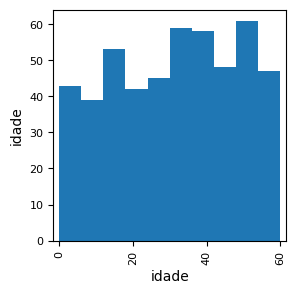

In [155]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(3, 3))
plt.show()

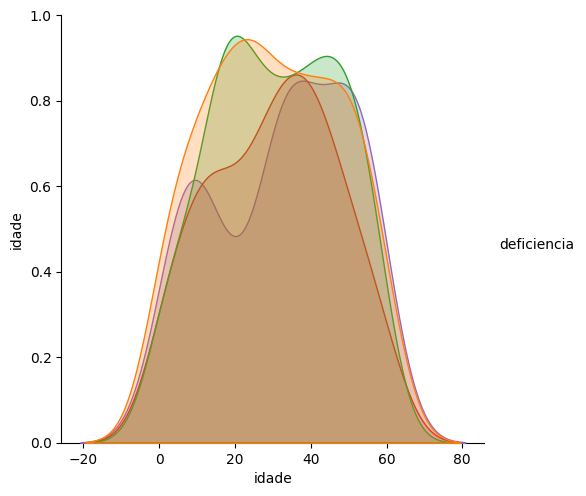

In [152]:
import seaborn as sns

# A cor vem do campo `species` do dataframe

sns.pairplot(df, hue='deficiencia', height=5)

plt.show()